In [1]:
!pip install -r requirements.txt

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tensorflow
import keras
import re
import pickle
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

2023-12-24 13:41:46.590213: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-24 13:41:46.592613: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-24 13:41:46.622199: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-24 13:41:46.622229: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-24 13:41:46.623398: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [3]:
df_twitter=pd.read_csv("labeled_data.csv")

In [4]:
df_twitter.columns

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')

In [5]:
df_twitter.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [6]:
df = df_twitter[['class', 'tweet']]

In [7]:
df.columns

Index(['class', 'tweet'], dtype='object')

In [8]:
##################### Split the data into training and testing #######################3

In [9]:
x = df['tweet']
Y = df['class']

In [10]:
x.describe()

count                                                 24783
unique                                                24783
top       !!! RT @mayasolovely: As a woman you shouldn't...
freq                                                      1
Name: tweet, dtype: object

In [11]:
Y.describe()

count    24783.000000
mean         1.110277
std          0.462089
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: class, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x , Y , test_size = 0.2 , random_state = 42)

In [13]:
print(x_train.shape)

(19826,)


In [14]:
print(x_test.shape)

(4957,)


In [15]:
print(y_train.shape)

(19826,)


In [16]:
print(y_test.shape)

(4957,)


In [17]:
########################## Clean text messages before passing it to the training model #################

In [18]:
import re
import nltk
from nltk.corpus import stopwords
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))
import string

In [19]:
stemmer = nltk.SnowballStemmer("english")

In [20]:
stopword=set(stopwords.words('english'))

In [21]:
def engineer_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [22]:
df['tweet'] = df['tweet'].apply(engineer_text)

/tmp/ipykernel_10051/1459820779.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tweet'] = df['tweet'].apply(engineer_text)


In [23]:
########################### Model Training ###########################

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
count = CountVectorizer(stop_words='english')

In [26]:
count.fit(df['tweet'])

CountVectorizer(stop_words='english')

In [27]:
len(count.vocabulary_)

25557

In [28]:
count.vocabulary_

{'rt': 18835,
 'mayasolov': 13965,
 'woman': 24729,
 'shouldnt': 19866,
 'complain': 4397,
 'clean': 4092,
 'hous': 9888,
 'amp': 625,
 'man': 13691,
 'alway': 539,
 'trash': 22808,
 'boy': 2621,
 'dat': 5225,
 'coldtyga': 4284,
 'dwn': 6377,
 'bad': 1387,
 'cuffin': 4904,
 'hoe': 9617,
 'place': 17051,
 'urkindofbrand': 23563,
 'dawg': 5269,
 'fuck': 7890,
 'bitch': 2111,
 'start': 20863,
 'cri': 4789,
 'confus': 4462,
 'shit': 19772,
 'cganderson': 3588,
 'vivabas': 23897,
 'look': 13235,
 'like': 12900,
 'tranni': 22770,
 'shenikarobert': 19715,
 'hear': 9277,
 'true': 22990,
 'faker': 7092,
 'told': 22570,
 'ya': 25026,
 'tmadisonx': 22511,
 'blow': 2374,
 'meclaim': 14052,
 'faith': 7086,
 'somebodi': 20471,
 'brighterday': 2806,
 'sit': 20048,
 'hate': 9190,
 'anoth': 772,
 'got': 8624,
 'caus': 3479,
 'im': 10336,
 'tire': 22472,
 'big': 1977,
 'come': 4337,
 'skinni': 20092,
 'rhythmixx': 18499,
 'hobbi': 9608,
 'includ': 10466,
 'fight': 7354,
 'mariambitch': 13794,
 'keek': 1

In [29]:
x_train_vector =count.fit_transform(x_train)

In [30]:
x_test_vector = count.transform(x_test) 

In [31]:
x_train_vector

<19826x30632 sparse matrix of type '<class 'numpy.int64'>'
	with 168476 stored elements in Compressed Sparse Row format>

In [32]:
x_test_vector

<4957x30632 sparse matrix of type '<class 'numpy.int64'>'
	with 36961 stored elements in Compressed Sparse Row format>

In [33]:
count.vocabulary_

{'rt': 22983,
 'funsizedyogi': 10848,
 'theblackvoice': 26486,
 'white': 29293,
 'ppl': 21159,
 'forget': 10475,
 'horrific': 12800,
 'past': 20333,
 'paint': 20194,
 'pretty': 21249,
 'picture': 20707,
 'ho': 12592,
 '8230': 1254,
 'funny': 10838,
 'thing': 26750,
 'just': 14850,
 'people': 20518,
 'doing': 8459,
 'seeing': 23638,
 'pics': 20705,
 'judging': 14778,
 'birds': 4146,
 'wrong': 29724,
 'winksosa': 29477,
 'aintshitsweet__': 2210,
 'rakwon_ogod': 21905,
 'nigga': 19099,
 'messed': 17703,
 'bitch': 4162,
 '128557': 426,
 '128514': 384,
 'https': 12891,
 '5mnxkvayot': 1089,
 'th_real_esco': 26380,
 'jbrendaro30': 14244,
 'zgabrail': 30512,
 'ramsin1995': 21931,
 'gabeeli8': 10934,
 'jacob2times': 14053,
 'ass': 2992,
 'nigggaaa': 19119,
 'real': 22098,
 'mia_coop': 17760,
 'speaking': 24943,
 'time': 26960,
 'tryna': 27611,
 'make': 17125,
 'look': 16642,
 'bad': 3370,
 'like': 16302,
 'wasn': 28911,
 'eating': 9042,
 'pussy': 21607,
 'nah': 18716,
 'mimi': 17938,
 'domworld

In [34]:
with open('count_vectorizer.pkl', 'wb') as file:
    pickle.dump(count, file)

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [36]:
model = RandomForestRegressor().fit(x_train_vector , y_train)

In [37]:
model_training = model.predict(x_train_vector)

In [38]:
model_testing = model.predict(x_test_vector)

In [39]:
zero = False
one = False
two = False

for val in y_test:
    if(val == 0 and zero == False):
        print("0 present")
        zero = True
    elif(val == 1 and one == False):
        print("1 present")
        one = True
    elif(val == 2 and two == False):
        print("2 present")
        two = True

1 present
2 present
0 present


In [40]:
# training
model_training_ = []
for i in range(0 , len(model_training)):
    val = int(model_training[i])
    model_training_.append(val)
# testing
model_testing_ = []
for i in range(0 , len(model_testing)):
    val = int(model_testing[i])
    model_testing_.append(val)

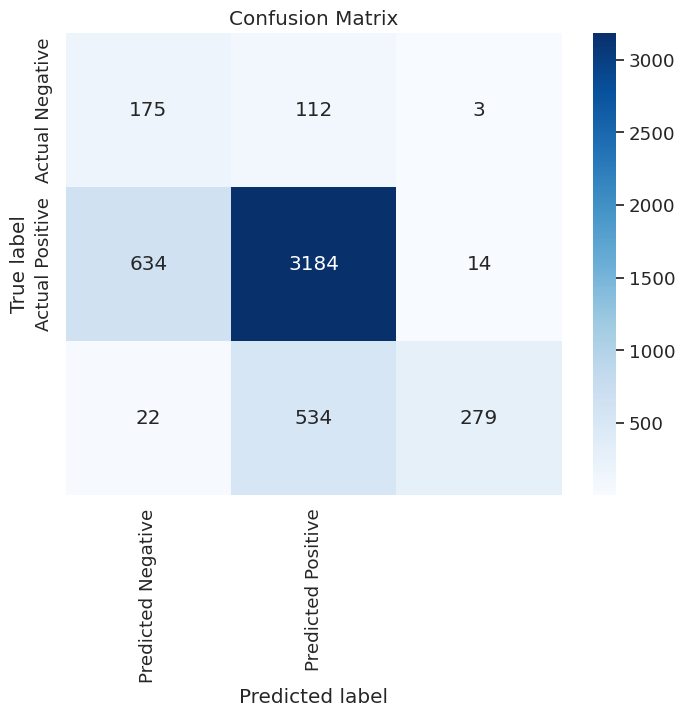

In [41]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, model_testing_)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [42]:
print (classification_report(model_testing_ , y_test))

              precision    recall  f1-score   support

           0       0.60      0.21      0.31       831
           1       0.83      0.83      0.83      3830
           2       0.33      0.94      0.49       296

    accuracy                           0.73      4957
   macro avg       0.59      0.66      0.55      4957
weighted avg       0.76      0.73      0.72      4957



In [43]:
from sklearn.metrics import accuracy_score

In [44]:
accuracy_ = accuracy_score(y_train , model_training_)

In [45]:
accuracy = accuracy_score(y_test , model_testing_)

In [46]:
print("training data accuracy: " , accuracy_)

training data accuracy:  0.8087360032280844


In [47]:
print("testing data accuracy: " , accuracy)

testing data accuracy:  0.7339116401049022


In [48]:
len(count.vocabulary_)

30632

In [49]:
test = 'Good morning kids! Its a great weather today!'

test=[engineer_text(test)]
print(test)
print()
seq = count.transform(test)
print(seq)
print()
output = model.predict(seq)
print(output)
print()
if(output >= 0 and output < 1.5):
    print("Hate and offensive speech")
else:
    print("Neither of the two")

['good morn kid great weather today']

  (0, 11477)	1
  (0, 11649)	1
  (0, 15305)	1
  (0, 27082)	1
  (0, 29037)	1

[1.89]

Neither of the two


In [50]:
test = 'Lets get married'

test=[engineer_text(test)]
print(test)
print()
seq = count.transform(test)
print(seq)

output = model.predict(seq)
print(output)
if(output >= 0 and output < 1.80):
    print("Hate and offensive speech")
else:
    print("Neither of the two")

['let get marri']

  (0, 16139)	1
[1.89]
Neither of the two


In [51]:
test = 'Get your ass out of here'

test=[engineer_text(test)]
print(test)
print()
seq = count.transform(test)
print(seq)

output = model.predict(seq)
print(output)
if(output >= 0 and output < 1.80):
    print("Hate and offensive speech")
else:
    print("Neither of the two")

['get ass']

  (0, 2992)	1
[1.]
Hate and offensive speech


In [52]:
with open('hate_speech_detection_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [53]:
################################ Use the AI Model ##########################################

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tensorflow
import keras
import re
import pickle
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
import re
import nltk
from nltk.corpus import stopwords
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))
import string
stemmer = nltk.SnowballStemmer("english")

def engineer_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

2023-12-24 13:58:49.296166: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-24 13:58:49.300400: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-24 13:58:49.371310: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-24 13:58:49.371361: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-24 13:58:49.372930: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [2]:
with open('hate_speech_detection_model.pkl', 'rb') as file:
    model = pickle.load(file)
    file.close()

In [3]:
with open('count_vectorizer.pkl', 'rb') as file:
    count = pickle.load(file)
    file.close()

In [4]:
def use_model():
    text = input("Enter the tweet: ")
    text = [engineer_text(text)]
    seq = count.transform(text)
    print(text)
    print()
    print(seq)
    print()
    
    output = model.predict(seq)
    print(output)
    
    if(output >= 0 and output <= 1.88):
        print("Hate and offensive speech")
    else:
        print("Neither of the two")

In [ ]:
use_model() 